## Assignment 1.2 A* Graph Search

### 📌 Important Information
- **Deadline**: October 11, 2024, by 23:59 (`Beijing Time`)
   
- **Submission File**:
    - You are required to submit both 1.1 (Tree Search) and 1.2 (A* Graph Search) together. 
    - You should additionally export your Jupyter Notebook (.ipynb file) with your answer as a **PDF**.

- **Submission Format**: 
    - Submit your answer via sustech blackboard system.
    - Place all the files (PDF and .ipynb) in a single folder, name it using your student ID_name (e.g., 12431112_WangShuoyuan), and compress it into a zip file. `The file structure should be`:

        ```
        12431112_WangShuoyuan/
        |–– assignment1.1.pdf
        |–– assignment1.1.ipynb
        |–– assignment1.2.pdf
        |–– assignment1.2.ipynb
        ```

### ℹ️ Introduction

In the assignment 1.2, you need to implement the A* **Graph** Search algorithm.  

Your implementation will be applied to a **grid-based maze**, where each cell in the grid can represent either a blocked cell, or a weighted cost. Your task is to `find a path from a given start point to a goal point`. 

For each A* search algorithm, you need to explore two heuristic functions including:
- Manhattan Distance (default)
- Euclidean Distance

### ❓Maze Setup
The maze is represented as a 2D grid (list of lists). Each cell in the grid contains a number that determines its type:
  - **-1**: Blocked space (you cannot move through this cell).
  - Any **positive number greater than 0**: A weighted space, where the number represents the cost to move into this cell (e.g., `2` means it costs 2 units to move here).
  - **Objective**: Generally, we take the top-left corner (0,0) as the `start` and find a path to the bottom-right corner.
  
Movement is allowed in **four directions**: up, down, left, and right (no diagonal movement).

### ⭐ Hint

#### Expected Input:
- `start` (tuple): The starting coordinates (row, col).
- `goal` (tuple): The goal coordinates (row, col).
- `heuristic` (str): heuristic function name.

#### Expected Output:
- A list of tuples representing the path from the start to the goal, or `None` if no path is found. 
For example: `[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6)]`

#### Tie breaking rule:
Break the tie based on the value of x, prioritizing nodes with smaller x values. If multiple nodes have the same x value, break the tie by selecting nodes with smaller y values first.


------------------------------------------------------------------------

In [9]:
import heapq
import math

import matplotlib.pyplot as plt
import numpy as np


class PathFinder:
    def __init__(self, grid):
        self.grid = grid
        self.rows = len(grid)
        self.cols = len(grid[0])

    def heuristic(self, node, goal, method="manhattan"):

        # default
        x1, y1 = node
        x2, y2 = goal

        if method == "manhattan":
            return abs(x2 - x1) + abs(y2 - y1)
        if method == "Euclidean":
            return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
        else:
            return 0

    def aStarGraphSearch(self, start, goal, heuristic_method):
        queue = []
        heapq.heappush(queue, (0, start))

        self.visited = set()
        costs = {start: 0}
        parent_map = {start: None}

        while queue:
            current_cost, current = heapq.heappop(queue)

            if current == goal:
                path = []
                while current is not None:
                    path.append(current)
                    current = parent_map[current]
                path.reverse()
                return path

            self.visited.add(current)

            directions = [(-1, 0), (0, -1), (1, 0), (0, 1)]

            for direction in directions:
                new_row = current[0] + direction[0]
                new_col = current[1] + direction[1]
                new_position = (new_row, new_col)

                if (
                    0 <= new_row < self.rows
                    and 0 <= new_col < self.cols
                    and new_position not in self.visited
                    and self.grid[new_row][new_col] != -1
                ):  # 确保不是障碍物

                    new_cost = (
                        current_cost
                        + self.grid[new_row][new_col]
                        + self.heuristic(new_position, goal, heuristic_method)
                    )

                    if new_position not in costs or new_cost < costs[new_position]:
                        costs[new_position] = new_cost  # 更新成本
                        parent_map[new_position] = current  # 设置父节点
                        heapq.heappush(queue, (new_cost, new_position))  # 入队
        pass

    def visualize_path(self, path):
        grid = np.array(self.grid)

        plt.figure(figsize=(10, 10))
        plt.imshow(grid, cmap="Greys", origin="upper")

        if path is not None:
            path_x = []
            path_y = []

            for point in path:
                path_x.append(point[0])
                path_y.append(point[1])

            plt.plot(
                path_y,
                path_x,
                marker="o",
                color="red",
                linewidth=2,
                markersize=6,
                label="Path",
            )

            plt.text(
                path[0][0],
                path[0][1],
                "Start",
                color="green",
                fontsize=12,
                ha="center",
                va="center",
            )
            plt.text(
                path[-1][0],
                path[-1][1],
                "Goal",
                color="blue",
                fontsize=12,
                ha="center",
                va="center",
            )

            plt.legend()
            plt.xticks(np.arange(grid.shape[1]))
            plt.yticks(np.arange(grid.shape[0]))
            plt.grid(True)
            plt.title("Path Visualization")

            plt.show()

## Test
You can use code below to test your implementation.

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (5, 4), (5, 5), (5, 6), (6, 6)]


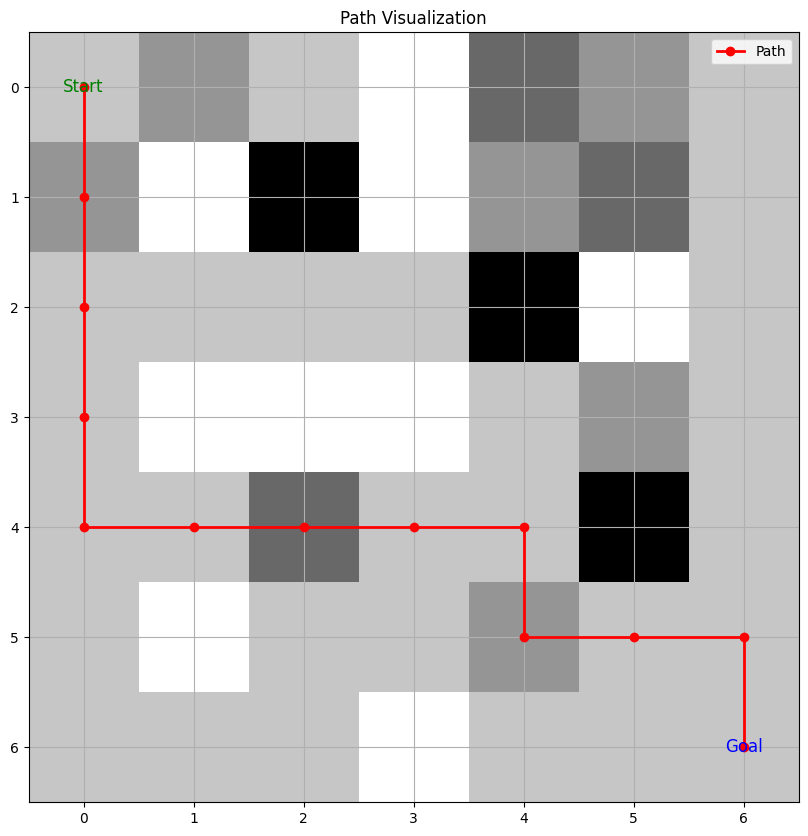

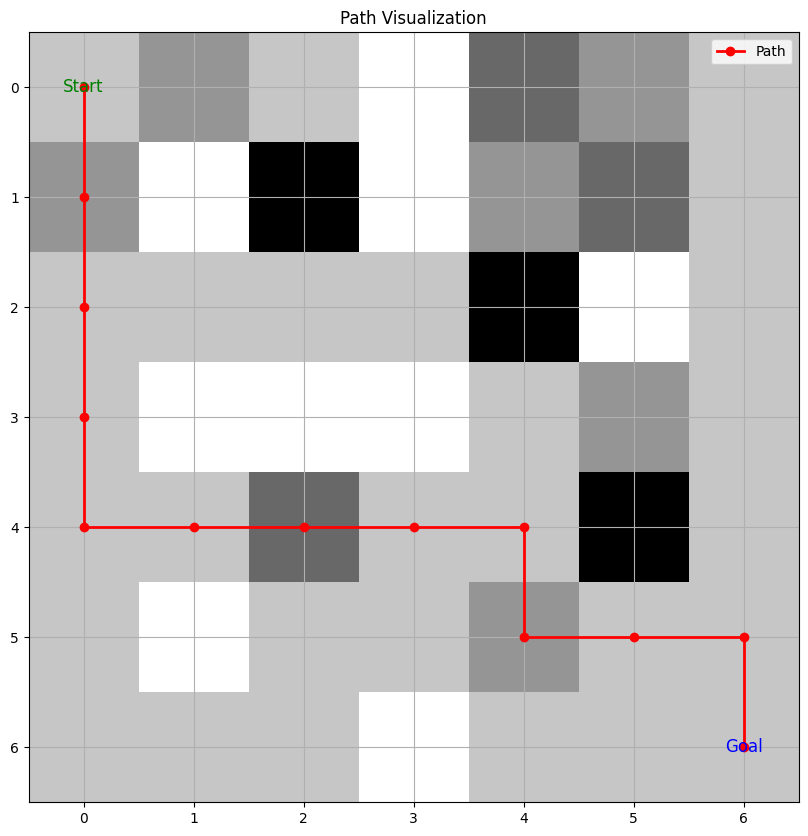

In [11]:
grid = [
    [1, 2, 1, -1, 3, 2, 1],
    [2, -1, 5, -1, 2, 3, 1],
    [1, 1, 1, 1, 5, -1, 1],
    [1, -1, -1, -1, 1, 2, 1],
    [1, 1, 3, 1, 1, 5, 1],
    [1, -1, 1, 1, 2, 1, 1],
    [1, 1, 1, -1, 1, 1, 1],
]

# build class
pathfinder = PathFinder(grid)

# start and goal
start = (0, 0)
goal = (6, 6)

# default heuristics
heuristic = "euclidean"
heuristic2 = "manhattan"
# find path
graph_path = pathfinder.aStarGraphSearch(start, goal, heuristic)
graph_path2 = pathfinder.aStarGraphSearch(start, goal, heuristic2)
print(graph_path)

# visualization
pathfinder.visualize_path(graph_path)
pathfinder.visualize_path(graph_path2)

## Results Discussion 

Are there any difference in the states expanded when using the given two heuristic functions? 

Please discuss how about using the actual cost as a heuristic. Would it be admissible or consistent? Would we save on nodes expanded? And what's wrong with it? 


(Write your answer below)


   曼哈顿距离,适用于只能在水平和垂直方向上移动的场景（如网格环境）。通常会导致更快的收敛，因为它引导搜索沿着网格的路径，更有效地找到目的地。 对于网格状况，状态扩展相对较少。
   欧几里得距离：适用于在任意方向上都可以移动的场景（如开放空间）。能够更准确地反映到目标的直线距离，尤其在允许对角线移动时，可能会探索更优的路径。在某些情况下，扩展的状态数可能会比曼哈顿距离更多，特别是在路径复杂或狭窄的环境中。
   所以这两种启发式在适用方面和扩展数量有不少不同。
   # 使用实际成本作为启发式函数
**可接受性（Admissibility）**：
如果将实际成本从起始节点到当前节点作为启发式函数，它并没有提供从当前节点到目标的估计。因此，它不能被视为启发式函数，因为它不符合启发式的定义，即必须预估从当前状态到目标的剩余成本。实际成本是历史成本，仅反映已走的路径，不遵循可接受性的要求。

**一致性（Consistency）**：
一致性要求，从节点 n 到目标的估计成本不应超过从 n 到 n' 的实际成本加上从 n' 到目标的估计成本。使用实际成本无法提供这一前瞻性的估计，因此也不满足一致性条件。

**节省状态扩展的可能性**：
使用实际成本作为启发式函数不会节省扩展的节点数，反而可能导致更多的节点被扩展：因为实际成本并不提供通往目标的明确方向和指导，导致搜索过程更为冗长且无序。结果可能会类似于均匀成本搜索，无法有效利用路径信息，降低了搜索效率。